In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from scipy import stats
import statsmodels.api as sm

In [3]:
data = pd.read_csv('../data/train_clean.csv')

## Add constant column to dataframe

In [4]:
data = sm.add_constant(data)
data.head()

,const,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice,CombinedIntPorch
0,1.0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,...,Y,0,61,0,2,2008,WD,Normal,208500,0
1,1.0,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,...,Y,298,0,0,5,2007,WD,Normal,181500,0
2,1.0,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,...,Y,0,42,0,9,2008,WD,Normal,223500,0
3,1.0,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,...,Y,0,35,272,2,2006,WD,Abnorml,140000,272
4,1.0,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,...,Y,192,84,0,12,2008,WD,Normal,250000,0


## Visualisation of correlation across whole dataframe

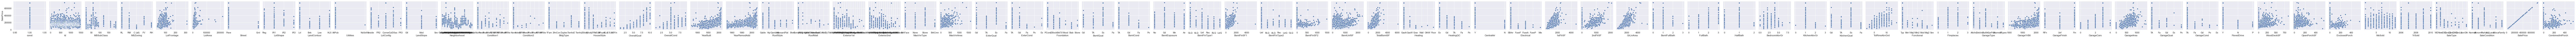

In [4]:
pp = sns.pairplot(data=data,
                  x_vars=data.columns,
                  y_vars=['SalePrice'])

## Look at correlation across whole dataframe numerically

In [5]:
correlation = data.corr()
correlation

,const,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SalePrice,CombinedIntPorch
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Id,NaN,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,...,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,0.021172,0.000712,-0.021917,-0.013438
MSSubClass,NaN,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,...,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.013585,-0.021407,-0.084284,-0.041788
LotFrontage,NaN,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,...,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.011200,0.007450,0.351799,0.059740
LotArea,NaN,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,...,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.001205,-0.014261,0.263843,0.022680
OverallQual,NaN,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,...,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.070815,-0.027347,0.790982,-0.029554
OverallCond,NaN,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,...,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,-0.003511,0.043950,-0.077856,0.097540
YearBuilt,NaN,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,...,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.012398,-0.013618,0.522897,-0.307627
YearRemodAdd,NaN,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,...,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.021490,0.035743,0.507101,-0.152674
MasVnrArea,NaN,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,...,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,-0.005965,-0.008201,0.477493,-0.032996


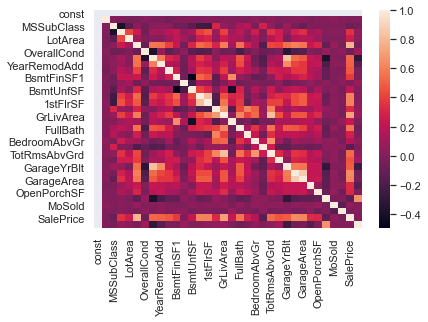

In [6]:
sns.heatmap(correlation)

## Narrow down to look at how each independent variable affects 'SalePrice'

In [7]:
ind_variables = correlation.loc["SalePrice"]

In [8]:
ind_variables = ind_variables.sort_values(ascending=False)
ind_variables

SalePrice           1.000000
OverallQual         0.790982
GrLivArea           0.708624
GarageCars          0.640409
GarageArea          0.623431
TotalBsmtSF         0.613581
1stFlrSF            0.605852
FullBath            0.560664
TotRmsAbvGrd        0.533723
YearBuilt           0.522897
YearRemodAdd        0.507101
GarageYrBlt         0.486362
MasVnrArea          0.477493
Fireplaces          0.466929
BsmtFinSF1          0.386420
LotFrontage         0.351799
WoodDeckSF          0.324413
2ndFlrSF            0.319334
OpenPorchSF         0.315856
HalfBath            0.284108
LotArea             0.263843
BsmtFullBath        0.227122
BsmtUnfSF           0.214479
BedroomAbvGr        0.168213
MoSold              0.046432
CombinedIntPorch   -0.004063
BsmtFinSF2         -0.011378
Id                 -0.021917
YrSold             -0.028923
OverallCond        -0.077856
MSSubClass         -0.084284
EnclosedPorch      -0.128578
KitchenAbvGr       -0.135907
const                    NaN
Name: SalePric

# Simple linear regression with independent variables showing more than 60% correlation with 'Sale Price'

### For each variable I will carry out the following steps:
- Calculate Pearson correlation coefficient using Numpy
- Plot a regression line using Seaborn
- Carry out OLS regression
- Use results to create new more accurate plot
- Look at the R-square value

### 1) OverallQual v SalePrice

In [9]:
np.corrcoef(data["OverallQual"], data["SalePrice"])
print(f"""The Pearson correlation coefficient for 'Overall Quality' & 'Sale Price' is {np.corrcoef(data["OverallQual"], data["SalePrice"])[0,1]}.
This shows that there is a strong positive correlation between the variables.""")

The Pearson correlation coefficient for 'Overall Quality' & 'Sale Price' is 0.7909816005838047.
This shows that there is a strong positive correlation between the variables.


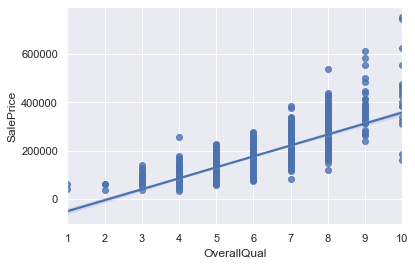

In [10]:
sns.regplot(x="OverallQual", y="SalePrice", data=data)

In [11]:
X1 = data[["const", "OverallQual"]]
Y1 = data["SalePrice"]
model1 = sm.OLS(Y1,X1)
results1 = model1.fit()
predictions1 = results1.predict(X1)

In [12]:
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     2437.
Date:                Tue, 17 Nov 2020   Prob (F-statistic):          2.19e-313
Time:                        16:53:25   Log-Likelihood:                -17827.
No. Observations:                1460   AIC:                         3.566e+04
Df Residuals:                    1458   BIC:                         3.567e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.621e+04   5756.407    -16.713      0.000   -1.07e+05   -8.49e+04
OverallQual  4.544e+04    920.430     49.364      0.000    4.36e+04    4.72e+04
==============================================================================
Omnibus:                      591.594   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5872.098
Skew:                           1.607   Prob(JB):                         0.00
Kurtosis:                      12.284   Cond. No.                         29.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

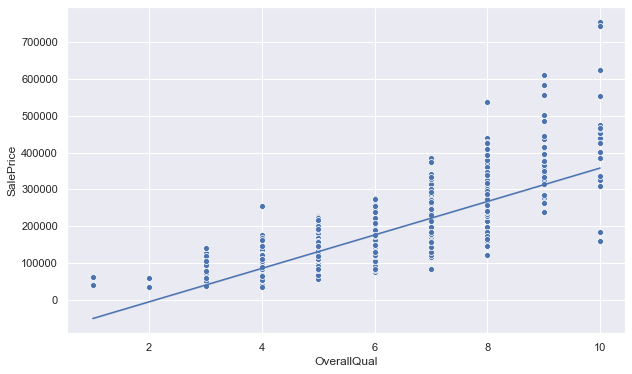

In [13]:
fix, ax = plt.subplots (figsize=(10,6))
sns.scatterplot(data=data, x="OverallQual", y="SalePrice", ax=ax);
sns.lineplot(data=data, x="OverallQual", y=results1.predict(data[["const", "OverallQual"]]), ax=ax);

In [14]:
print("parameters\n",results1.params)
print("rsquared\n",results1.rsquared)
print("rsquared_adj\n",results1.rsquared_adj)

print(f"""\nThe R-Squared value shows that our model is {results1.rsquared*100}% accurate.""")

parameters
 const         -96206.079515
OverallQual    45435.802593
dtype: float64
rsquared
 0.625651892462118
rsquared_adj
 0.6253951379301991

The R-Squared value shows that our model is 62.56518924621181% accurate.


# 2) GrLivArea v SalePrice

In [15]:
np.corrcoef(data["GrLivArea"], data["SalePrice"])
print(f"""The Pearson correlation coefficient for 'Above Ground Living Area' & 'Sale Price' is {np.corrcoef(data["GrLivArea"], data["SalePrice"])[0,1]}.
This shows that there is a strong positive correlation between the variables.""")

The Pearson correlation coefficient for 'Above Ground Living Area' & 'Sale Price' is 0.7086244776126522.
This shows that there is a strong positive correlation between the variables.


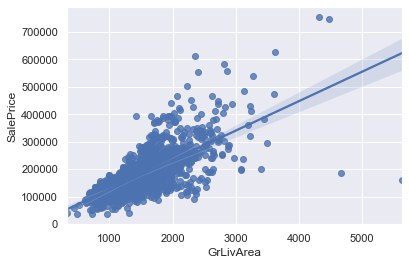

In [16]:
sns.regplot(x="GrLivArea", y="SalePrice", data=data)

In [17]:
X2 = data[["const", "GrLivArea"]]
Y2 = data["SalePrice"]
model2 = sm.OLS(Y2,X2)
results2 = model2.fit()
predictions2 = results2.predict(X2)

In [18]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Tue, 17 Nov 2020   Prob (F-statistic):          4.52e-223
Time:                        16:53:27   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.857e+04   4480.755      4.144      0.000    9779.612    2.74e+04
GrLivArea    107.1304      2.794     38.348      0.000     101.650     112.610
==============================================================================
Omnibus:                      261.166   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3432.287
Skew:                           0.410   Prob(JB):                         0.00
Kurtosis:                      10.467   Cond. No.                     4.90e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

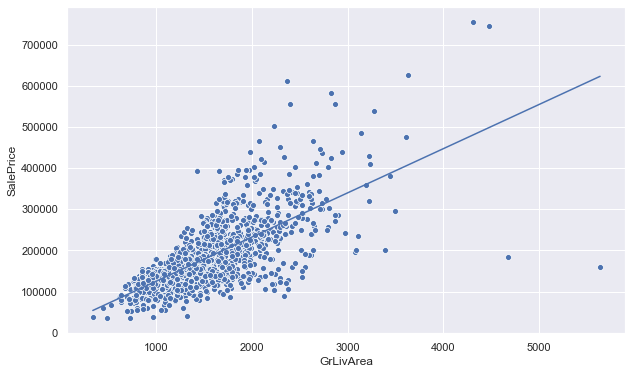

In [19]:
fix, ax = plt.subplots (figsize=(10,6))
sns.scatterplot(data=data, x="GrLivArea", y="SalePrice", ax=ax);
sns.lineplot(data=data, x="GrLivArea", y=results2.predict(data[["const", "GrLivArea"]]), ax=ax);

In [20]:
print("parameters\n",results2.params)
print("rsquared\n",results2.rsquared)
print("rsquared_adj\n",results2.rsquared_adj)

print(f"""\nThe R-Squared value shows that our model is {results2.rsquared*100}% accurate.""")

parameters
 const        18569.025856
GrLivArea      107.130359
dtype: float64
rsquared
 0.5021486502718042
rsquared_adj
 0.5018071884407149

The R-Squared value shows that our model is 50.21486502718042% accurate.


# 3) GarageCars v SalePrice

In [21]:
np.corrcoef(data["GarageCars"], data["SalePrice"])
print(f"""The Pearson correlation coefficient for 'Size of Garage in Car Capacity' & 'Sale Price' is {np.corrcoef(data["GarageCars"], data["SalePrice"])[0,1]}.
This shows that there is a moderate positive correlation between the variables.""")

The Pearson correlation coefficient for 'Size of Garage in Car Capacity' & 'Sale Price' is 0.6404091972583531.
This shows that there is a moderate positive correlation between the variables.


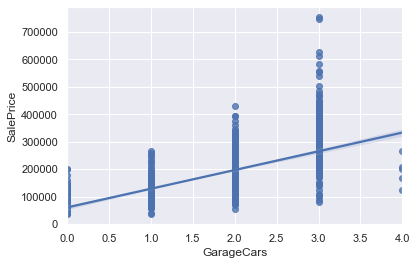

In [22]:
sns.regplot(x="GarageCars", y="SalePrice", data=data)

In [23]:
X3 = data[["const", "GarageCars"]]
Y3 = data["SalePrice"]
model3 = sm.OLS(Y3,X3)
results3 = model3.fit()
predictions3 = results3.predict(X3)

In [24]:
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     1014.
Date:                Tue, 17 Nov 2020   Prob (F-statistic):          2.50e-169
Time:                        16:53:39   Log-Likelihood:                -18159.
No. Observations:                1460   AIC:                         3.632e+04
Df Residuals:                    1458   BIC:                         3.633e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.062e+04   4102.261     14.777      0.000    5.26e+04    6.87e+04
GarageCars  6.808e+04   2138.212     31.839      0.000    6.39e+04    7.23e+04
==============================================================================
Omnibus:                      590.054   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5085.044
Skew:                           1.649   Prob(JB):                         0.00
Kurtosis:                      11.527   Cond. No.                         6.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

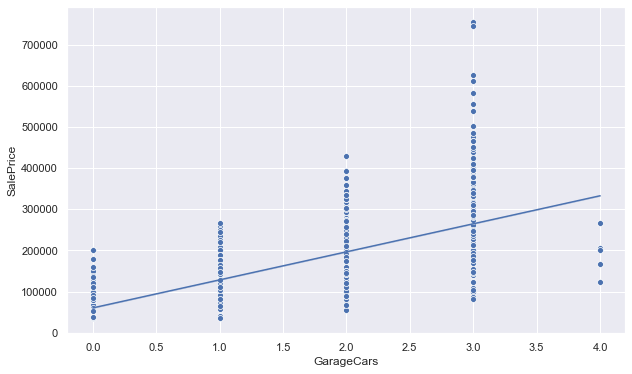

In [25]:
fix, ax = plt.subplots (figsize=(10,6))
sns.scatterplot(data=data, x="GarageCars", y="SalePrice", ax=ax);
sns.lineplot(data=data, x="GarageCars", y=results3.predict(data[["const", "GarageCars"]]), ax=ax);

In [26]:
print("parameters\n",results3.params)
print("rsquared\n",results3.rsquared)
print("rsquared_adj\n",results3.rsquared_adj)

print(f"""\nThe R-Squared value shows that our model is {results3.rsquared*100}% accurate.""")

parameters
 const         60618.980872
GarageCars    68077.997646
dtype: float64
rsquared
 0.41012393993308693
rsquared_adj
 0.40971936101671735

The R-Squared value shows that our model is 41.01239399330869% accurate.


# 4) GarageArea v SalePrice

In [27]:
np.corrcoef(data["GarageArea"], data["SalePrice"])
print(f"""The Pearson correlation coefficient for 'Garage Area' & 'Sale Price' is {np.corrcoef(data["GarageArea"], data["SalePrice"])[0,1]}.
This shows that there is a moderate positive correlation between the variables.""")

The Pearson correlation coefficient for 'Garage Area' & 'Sale Price' is 0.6234314389183617.
This shows that there is a moderate positive correlation between the variables.


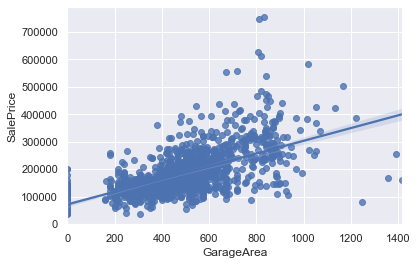

In [28]:
sns.regplot(x="GarageArea", y="SalePrice", data=data)

In [29]:
X4 = data[["const", "GarageArea"]]
Y4 = data["SalePrice"]
model4 = sm.OLS(Y4,X4)
results4 = model4.fit()
predictions4 = results4.predict(X4)

In [30]:
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     927.0
Date:                Tue, 17 Nov 2020   Prob (F-statistic):          5.27e-158
Time:                        16:53:40   Log-Likelihood:                -18185.
No. Observations:                1460   AIC:                         3.637e+04
Df Residuals:                    1458   BIC:                         3.638e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.136e+04   3949.003     18.070      0.000    6.36e+04    7.91e+04
GarageArea   231.6456      7.608     30.446      0.000     216.721     246.570
==============================================================================
Omnibus:                      562.790   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5197.079
Skew:                           1.533   Prob(JB):                         0.00
Kurtosis:                      11.720   Cond. No.                     1.26e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

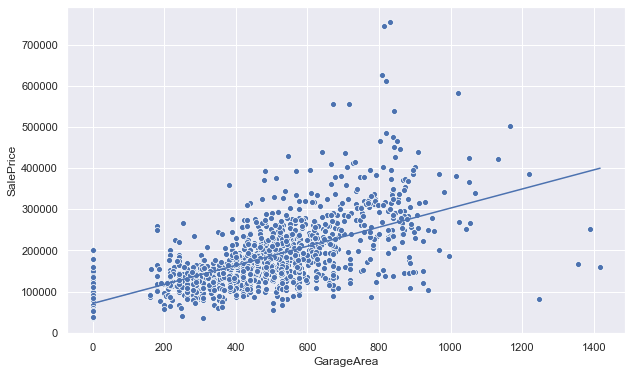

In [31]:
fix, ax = plt.subplots (figsize=(10,6))
sns.scatterplot(data=data, x="GarageArea", y="SalePrice", ax=ax);
sns.lineplot(data=data, x="GarageArea", y=results4.predict(data[["const", "GarageArea"]]), ax=ax);

In [32]:
print("parameters\n",results4.params)
print("rsquared\n",results4.rsquared)
print("rsquared_adj\n",results4.rsquared_adj)

print(f"""\nThe R-Squared value shows that our model is {results4.rsquared*100}% accurate.""")

parameters
 const         71357.421407
GarageArea      231.645615
dtype: float64
rsquared
 0.388666759031819
rsquared_adj
 0.3882474632561207

The R-Squared value shows that our model is 38.8666759031819% accurate.


# 5) TotalBsmtSF v SalePrice

In [33]:
np.corrcoef(data["TotalBsmtSF"], data["SalePrice"])
print(f"""The Pearson correlation coefficient for 'Total Basement Area' & 'Sale Price' is {np.corrcoef(data["TotalBsmtSF"], data["SalePrice"])[0,1]}.
This shows that there is a moderate positive correlation between the variables.""")

The Pearson correlation coefficient for 'Total Basement Area' & 'Sale Price' is 0.6135805515591954.
This shows that there is a moderate positive correlation between the variables.


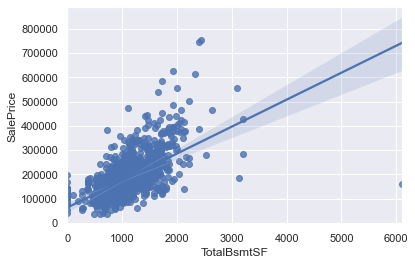

In [34]:
sns.regplot(x="TotalBsmtSF", y="SalePrice", data=data)

In [35]:
X5 = data[["const", "TotalBsmtSF"]]
Y5 = data["SalePrice"]
model5 = sm.OLS(Y5,X5)
results5 = model5.fit()
predictions5 = results5.predict(X5)

In [36]:
results5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     880.3
Date:                Tue, 17 Nov 2020   Prob (F-statistic):          9.48e-152
Time:                        16:53:49   Log-Likelihood:                -18199.
No. Observations:                1460   AIC:                         3.640e+04
Df Residuals:                    1458   BIC:                         3.641e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6.343e+04   4286.892     14.796      0.000     5.5e+04    7.18e+04
TotalBsmtSF   111.1096      3.745     29.671      0.000     103.764     118.455
==============================================================================
Omnibus:                      386.381   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5810.518
Skew:                           0.809   Prob(JB):                         0.00
Kurtosis:                      12.638   Cond. No.                     2.99e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

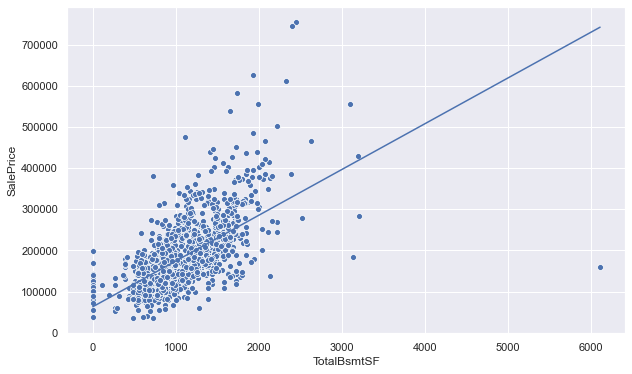

In [37]:
fix, ax = plt.subplots (figsize=(10,6))
sns.scatterplot(data=data, x="TotalBsmtSF", y="SalePrice", ax=ax);
sns.lineplot(data=data, x="TotalBsmtSF", y=results5.predict(data[["const", "TotalBsmtSF"]]), ax=ax);

In [38]:
print("parameters\n",results5.params)
print("rsquared\n",results5.rsquared)
print("rsquared_adj\n",results5.rsquared_adj)

print(f"""\nThe R-Squared value shows that our model is {results5.rsquared*100}% accurate.""")

parameters
 const          63430.628546
TotalBsmtSF      111.109604
dtype: float64
rsquared
 0.37648109325168655
rsquared_adj
 0.3760534396805286

The R-Squared value shows that our model is 37.648109325168654% accurate.


# 6) 1stFlrSF v SalePrice

In [39]:
np.corrcoef(data["1stFlrSF"], data["SalePrice"])
print(f"""The Pearson correlation coefficient for 'First Floor Area' & 'Sale Price' is {np.corrcoef(data["1stFlrSF"], data["SalePrice"])[0,1]}.
This shows that there is a moderate positive correlation between the variables.""")

The Pearson correlation coefficient for 'First Floor Area' & 'Sale Price' is 0.6058521846919148.
This shows that there is a moderate positive correlation between the variables.


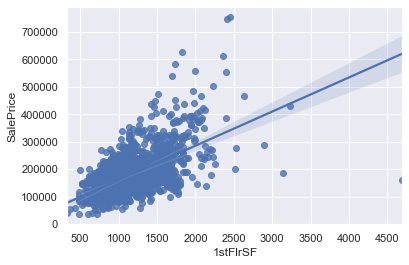

In [40]:
sns.regplot(x="1stFlrSF", y="SalePrice", data=data)

In [41]:
X6 = data[["const", "1stFlrSF"]]
Y6 = data["SalePrice"]
model6 = sm.OLS(Y6,X6)
results6 = model6.fit()
predictions6 = results6.predict(X6)

In [42]:
results6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     845.5
Date:                Tue, 17 Nov 2020   Prob (F-statistic):          5.39e-147
Time:                        16:53:59   Log-Likelihood:                -18210.
No. Observations:                1460   AIC:                         3.642e+04
Df Residuals:                    1458   BIC:                         3.643e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.617e+04   5245.728      6.896      0.000    2.59e+04    4.65e+04
1stFlrSF     124.5006      4.282     29.078      0.000     116.102     132.899
==============================================================================
Omnibus:                      373.497   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2669.199
Skew:                           0.997   Prob(JB):                         0.00
Kurtosis:                       9.317   Cond. No.                     3.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

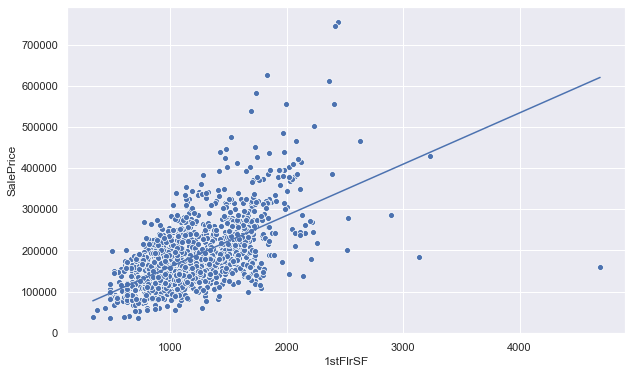

In [43]:
fix, ax = plt.subplots (figsize=(10,6))
sns.scatterplot(data=data, x="1stFlrSF", y="SalePrice", ax=ax);
sns.lineplot(data=data, x="1stFlrSF", y=results6.predict(data[["const", "1stFlrSF"]]), ax=ax);

In [44]:
print("parameters\n",results6.params)
print("rsquared\n",results6.rsquared)
print("rsquared_adj\n",results6.rsquared_adj)

print(f"""\nThe R-Squared value shows that our model is {results6.rsquared*100}% accurate.""")

parameters
 const       36173.446795
1stFlrSF      124.500622
dtype: float64
rsquared
 0.36705686969596585
rsquared_adj
 0.3666227523226435

The R-Squared value shows that our model is 36.705686969596584% accurate.


# Look into categorical variables

In [45]:
data["SaleCondition"].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [46]:
data["BldgType"].value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [47]:
data["MSZoning"].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [48]:
data["HouseStyle"].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

# Does the neighbourhood affect house price?

Assign dummy variables to Neighborhood categories in preparation for analysis

In [49]:
data_hood = pd.get_dummies(data['Neighborhood'], drop_first=False)
data_hood['SalePrice'] = data['SalePrice'].values
data_hood

,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,...,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,SalePrice
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,208500
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,181500
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,223500
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,140000
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,175000
1456,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,210000
1457,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,266500
1458,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,142125


Create a list of all the neighbourhoods

In [50]:
neighborhoods = list(data_hood.columns)
neighborhoods = neighborhoods[:-1]
neighborhoods

['Blmngtn',
 'Blueste',
 'BrDale',
 'BrkSide',
 'ClearCr',
 'CollgCr',
 'Crawfor',
 'Edwards',
 'Gilbert',
 'IDOTRR',
 'MeadowV',
 'Mitchel',
 'NAmes',
 'NPkVill',
 'NWAmes',
 'NoRidge',
 'NridgHt',
 'OldTown',
 'SWISU',
 'Sawyer',
 'SawyerW',
 'Somerst',
 'StoneBr',
 'Timber',
 'Veenker']

Look at correlation across whole dataframe

In [51]:
correlation_hood = data_hood.corr()
correlation_hood

,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,...,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,SalePrice
Blmngtn,1.000000,-0.004020,-0.011425,-0.022077,-0.015177,-0.036728,-0.020650,-0.029432,-0.025960,-0.017502,...,-0.025611,-0.031437,-0.014326,-0.025080,-0.022274,-0.027155,-0.014326,-0.017743,-0.009457,0.019066
Blueste,-0.004020,1.000000,-0.003899,-0.007533,-0.005179,-0.012533,-0.007046,-0.010043,-0.008858,-0.005972,...,-0.008739,-0.010727,-0.004889,-0.008558,-0.007601,-0.009266,-0.004889,-0.006054,-0.003227,-0.020250
BrDale,-0.011425,-0.003899,1.000000,-0.021410,-0.014719,-0.035619,-0.020027,-0.028543,-0.025176,-0.016974,...,-0.024838,-0.030488,-0.013894,-0.024323,-0.021601,-0.026335,-0.013894,-0.017208,-0.009171,-0.101303
BrkSide,-0.022077,-0.007533,-0.021410,1.000000,-0.028441,-0.068826,-0.038696,-0.055153,-0.048647,-0.032797,...,-0.047993,-0.058911,-0.026846,-0.046997,-0.041739,-0.050886,-0.026846,-0.033249,-0.017722,-0.143648
ClearCr,-0.015177,-0.005179,-0.014719,-0.028441,1.000000,-0.047317,-0.026603,-0.037917,-0.033444,-0.022548,...,-0.032995,-0.040501,-0.018457,-0.032310,-0.028696,-0.034984,-0.018457,-0.022859,-0.012183,0.055718
CollgCr,-0.036728,-0.012533,-0.035619,-0.068826,-0.047317,1.000000,-0.064378,-0.091757,-0.080933,-0.054564,...,-0.079844,-0.098009,-0.044664,-0.078189,-0.069441,-0.084658,-0.044664,-0.055316,-0.029483,0.072626
Crawfor,-0.020650,-0.007046,-0.020027,-0.038696,-0.026603,-0.064378,1.000000,-0.051589,-0.045504,-0.030678,...,-0.044891,-0.055104,-0.025112,-0.043961,-0.039042,-0.047598,-0.025112,-0.031101,-0.016576,0.071160
Edwards,-0.029432,-0.010043,-0.028543,-0.055153,-0.037917,-0.091757,-0.051589,1.000000,-0.064856,-0.043725,...,-0.063983,-0.078539,-0.035791,-0.062656,-0.055646,-0.067840,-0.035791,-0.044327,-0.023626,-0.179949
Gilbert,-0.025960,-0.008858,-0.025176,-0.048647,-0.033444,-0.080933,-0.045504,-0.064856,1.000000,-0.038567,...,-0.056435,-0.069274,-0.031569,-0.055265,-0.049082,-0.059837,-0.031569,-0.039098,-0.020839,0.035940
IDOTRR,-0.017502,-0.005972,-0.016974,-0.032797,-0.022548,-0.054564,-0.030678,-0.043725,-0.038567,1.000000,...,-0.038048,-0.046704,-0.021283,-0.037259,-0.033091,-0.040342,-0.021283,-0.026360,-0.014049,-0.164056


Look at correlation between 'SalePrice' and 'Neighbourhood'

In [52]:
ind_variables_hood = correlation_hood.loc["SalePrice"]
ind_variables_hood

Blmngtn      0.019066
Blueste     -0.020250
BrDale      -0.101303
BrkSide     -0.143648
ClearCr      0.055718
CollgCr      0.072626
Crawfor      0.071160
Edwards     -0.179949
Gilbert      0.035940
IDOTRR      -0.164056
MeadowV     -0.112544
Mitchel     -0.057845
NAmes       -0.188513
NPkVill     -0.037910
NWAmes       0.023483
NoRidge      0.330424
NridgHt      0.402149
OldTown     -0.192189
SWISU       -0.063705
Sawyer      -0.128394
SawyerW      0.014560
Somerst      0.140058
StoneBr      0.215363
Timber       0.126236
Veenker      0.063471
SalePrice    1.000000
Name: SalePrice, dtype: float64

### Look at how accurate the OLS model is with only one neighbourhood as a variable

In [56]:
Xa = data_hood[["NridgHt"]]
Xa = sm.add_constant(Xa)
Ya = data_hood["SalePrice"]

In [57]:
modela = sm.OLS(Ya,Xa)
resultsa = modela.fit()
predictionsa = resultsa.predict(Xa)

In [58]:
resultsa.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     281.3
Date:                Tue, 17 Nov 2020   Prob (F-statistic):           7.30e-58
Time:                        16:54:36   Log-Likelihood:                -18415.
No. Observations:                1460   AIC:                         3.683e+04
Df Residuals:                    1458   BIC:                         3.685e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.734e+05   1956.520     88.619      0.000     1.7e+05    1.77e+05
NridgHt     1.429e+05   8519.526     16.771      0.000    1.26e+05     1.6e+05
==============================================================================
Omnibus:                      641.547   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4790.970
Skew:                           1.883   Prob(JB):                         0.00
Kurtosis:                      11.036   Cond. No.                         4.49
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
print("parameters\n",resultsa.params)
print("rsquared\n",resultsa.rsquared)
print("rsquared_adj\n",resultsa.rsquared_adj)

print(f"""\nThe R-Squared value shows that our model is {resultsa.rsquared*100}% accurate.""")

parameters
 const      173385.472162
NridgHt    142885.151215
dtype: float64
rsquared
 0.16172349501433336
rsquared_adj
 0.1611485454224365

The R-Squared value shows that our model is 16.172349501433338% accurate.


### Look at how accurate the OLS model is with all neighbourhoods as variables

In [60]:
Xb = data_hood[neighborhoods]
Xb = sm.add_constant(Xb)
Yb = data_hood["SalePrice"]

In [61]:
modelb = sm.OLS(Yb,Xb)
resultsb = modelb.fit()
predictionsb = resultsb.predict(Xb)

In [62]:
resultsb.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     71.78
Date:                Tue, 17 Nov 2020   Prob (F-statistic):          1.56e-225
Time:                        16:54:52   Log-Likelihood:                -17968.
No. Observations:                1460   AIC:                         3.599e+04
Df Residuals:                    1435   BIC:                         3.612e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.769e+05   2316.697     76.354      0.000    1.72e+05    1.81e+05
Blmngtn     1.798e+04   1.28e+04      1.405      0.160   -7116.085    4.31e+04
Blueste    -3.939e+04   3.68e+04     -1.072      0.284   -1.11e+05    3.27e+04
BrDale      -7.24e+04   1.32e+04     -5.495      0.000   -9.82e+04   -4.66e+04
BrkSide    -5.206e+04   7195.405     -7.235      0.000   -6.62e+04   -3.79e+04
ClearCr     3.568e+04   1.01e+04      3.541      0.000    1.59e+04    5.54e+04
CollgCr     2.108e+04   4828.150      4.365      0.000    1.16e+04    3.05e+04
Crawfor     3.374e+04   7625.183      4.424      0.000    1.88e+04    4.87e+04
Edwards    -4.867e+04   5681.814     -8.566      0.000   -5.98e+04   -3.75e+04
Gilbert     1.597e+04   6279.958      2.542      0.011    3646.342    2.83e+04
IDOTRR     -7.677e+04   8838.146     -8.686      0.000   -9.41e+04   -5.94e+04
MeadowV    -7.831e+04   1.28e+04     -6.121      0.000   -1.03e+05   -5.32e+04
Mitchel    -2.062e+04   7765.150     -2.655      0.008   -3.59e+04   -5386.898
NAmes      -3.104e+04   4162.898     -7.457      0.000   -3.92e+04   -2.29e+04
NPkVill    -3.419e+04   1.74e+04     -1.960      0.050   -6.84e+04      31.496
NWAmes      1.216e+04   6499.094      1.871      0.062    -587.956    2.49e+04
NoRidge     1.584e+05   8427.081     18.797      0.000    1.42e+05    1.75e+05
NridgHt     1.394e+05   6350.026     21.950      0.000    1.27e+05    1.52e+05
OldTown    -4.866e+04   5402.452     -9.008      0.000   -5.93e+04   -3.81e+04
SWISU       -3.43e+04   1.06e+04     -3.226      0.001   -5.52e+04   -1.34e+04
Sawyer      -4.01e+04   6460.647     -6.206      0.000   -5.28e+04   -2.74e+04
SawyerW     9666.5146   7140.539      1.354      0.176   -4340.499    2.37e+04
Somerst     4.849e+04   6055.136      8.008      0.000    3.66e+04    6.04e+04
StoneBr     1.336e+05   1.06e+04     12.567      0.000    1.13e+05    1.54e+05
Timber      6.536e+04   8729.174      7.487      0.000    4.82e+04    8.25e+04
Veenker     6.188e+04   1.58e+04      3.913      0.000    3.09e+04    9.29e+04
==============================================================================
Omnibus:                      618.883   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5526.438
Skew:                           1.737   Prob(JB):                         0.00
Kurtosis:                      11.875   Cond. No.                     4.70e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.08e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [63]:
print("parameters\n",resultsb.params)
print("rsquared\n",resultsb.rsquared)
print("rsquared_adj\n",resultsb.rsquared_adj)

print(f"""\nThe R-Squared Adjusted value shows that our model is {resultsb.rsquared_adj*100}% accurate.""")

parameters
 const      176889.282019
Blmngtn     17981.600334
Blueste    -39389.282019
BrDale     -72395.532019
BrkSide    -52055.230295
ClearCr     35676.146553
CollgCr     21076.491314
Crawfor     33735.443471
Edwards    -48669.582019
Gilbert     15965.224310
IDOTRR     -76765.498235
MeadowV    -78312.811431
Mitchel    -20619.159570
NAmes      -31042.202019
NPkVill    -34194.837574
NWAmes      12160.786474
NoRidge    158406.035054
NridgHt    139381.341358
OldTown    -48663.981134
SWISU      -34297.922019
Sawyer     -40096.146884
SawyerW      9666.514591
Somerst     48490.555190
StoneBr    133609.717981
Timber      65358.165350
Veenker     61883.445254
dtype: float64
rsquared
 0.5455749908095633
rsquared_adj
 0.5379748512830334

The R-Squared Adjusted value shows that our model is 53.797485128303336% accurate.


# Look at variables that are related to square footage

Variables: "LotArea", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "GrLivArea", "GarageArea", "WoodDeckSF", "OpenPorchSF", "CombinedIntPorch"


In [64]:
sqfoot = data[["LotArea", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "GrLivArea", "GarageArea", "WoodDeckSF", "OpenPorchSF", "CombinedIntPorch", "SalePrice"
]].copy()

In [65]:
sqfoot

,LotArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,CombinedIntPorch,SalePrice
0,8450,856,856,854,1710,548,0,61,0,208500
1,9600,1262,1262,0,1262,460,298,0,0,181500
2,11250,920,920,866,1786,608,0,42,0,223500
3,9550,756,961,756,1717,642,0,35,272,140000
4,14260,1145,1145,1053,2198,836,192,84,0,250000
...,...,...,...,...,...,...,...,...,...,...
1455,7917,953,953,694,1647,460,0,40,0,175000
1456,13175,1542,2073,0,2073,500,349,0,0,210000
1457,9042,1152,1188,1152,2340,252,0,60,0,266500
1458,9717,1078,1078,0,1078,240,366,0,112,142125


In [66]:
areas = list(sqfoot.columns)
areas = areas[:-1]
areas

['LotArea',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'CombinedIntPorch']

In [67]:
correlation_area = sqfoot.corr()
correlation_area

,LotArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,CombinedIntPorch,SalePrice
LotArea,1.000000,0.260833,0.299475,0.050986,0.263116,0.180403,0.171698,0.084774,0.022680,0.263843
TotalBsmtSF,0.260833,1.000000,0.819530,-0.174512,0.454868,0.486665,0.232019,0.247264,-0.000345,0.613581
1stFlrSF,0.299475,0.819530,1.000000,-0.202646,0.566024,0.489782,0.235459,0.211671,0.031332,0.605852
2ndFlrSF,0.050986,-0.174512,-0.202646,1.000000,0.687501,0.138347,0.092165,0.208026,0.064258,0.319334
GrLivArea,0.263116,0.454868,0.566024,0.687501,1.000000,0.468997,0.247433,0.330224,0.082113,0.708624
GarageArea,0.180403,0.486665,0.489782,0.138347,0.468997,1.000000,0.224666,0.241435,-0.042700,0.623431
WoodDeckSF,0.171698,0.232019,0.235459,0.092165,0.247433,0.224666,1.000000,0.058661,-0.154031,0.324413
OpenPorchSF,0.084774,0.247264,0.211671,0.208026,0.330224,0.241435,0.058661,1.000000,-0.020669,0.315856
CombinedIntPorch,0.022680,-0.000345,0.031332,0.064258,0.082113,-0.042700,-0.154031,-0.020669,1.000000,-0.004063
SalePrice,0.263843,0.613581,0.605852,0.319334,0.708624,0.623431,0.324413,0.315856,-0.004063,1.000000


In [68]:
ind_variables_area = correlation_area.loc["SalePrice"]
ind_variables_area

LotArea             0.263843
TotalBsmtSF         0.613581
1stFlrSF            0.605852
2ndFlrSF            0.319334
GrLivArea           0.708624
GarageArea          0.623431
WoodDeckSF          0.324413
OpenPorchSF         0.315856
CombinedIntPorch   -0.004063
SalePrice           1.000000
Name: SalePrice, dtype: float64

In [69]:
Xc = sqfoot[areas]
Xc = sm.add_constant(Xc)
Yc = sqfoot["SalePrice"]

In [70]:
modelc = sm.OLS(Yc,Xc)
resultsc = modelc.fit()
predictionsc = resultsc.predict(Xc)

In [71]:
resultsc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     335.8
Date:                Tue, 17 Nov 2020   Prob (F-statistic):               0.00
Time:                        16:55:34   Log-Likelihood:                -17722.
No. Observations:                1460   AIC:                         3.546e+04
Df Residuals:                    1450   BIC:                         3.552e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.994e+04   4217.280     -4.729      0.000   -2.82e+04   -1.17e+04
LotArea              0.1552      0.126      1.229      0.219      -0.092       0.403
TotalBsmtSF         50.1501      4.857     10.324      0.000      40.622      59.678
1stFlrSF            87.0589     25.494      3.415      0.001      37.051     137.067
2ndFlrSF            95.1664     25.030      3.802      0.000      46.068     144.264
GrLivArea          -26.7534     24.624     -1.086      0.277     -75.055      21.548
GarageArea          95.9813      6.827     14.058      0.000      82.589     109.374
WoodDeckSF          57.4907     10.127      5.677      0.000      37.626      77.355
OpenPorchSF         45.3113     19.297      2.348      0.019       7.459      83.164
CombinedIntPorch   -10.4916     14.658     -0.716      0.474     -39.245      18.261
==============================================================================
Omnibus:                      763.198   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            77370.499
Skew:                          -1.484   Prob(JB):                         0.00
Kurtosis:                      38.539   Cond. No.                     5.19e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
print("parameters\n",resultsc.params)
print("rsquared\n",resultsc.rsquared)
print("rsquared_adj\n",resultsc.rsquared_adj)

print(f"""\nThe R-Squared Adjusted value shows that our model is {resultsc.rsquared_adj*100}% accurate.""")

parameters
 const              -19942.443543
LotArea                 0.155241
TotalBsmtSF            50.150116
1stFlrSF               87.058929
2ndFlrSF               95.166394
GrLivArea             -26.753401
GarageArea             95.981265
WoodDeckSF             57.490665
OpenPorchSF            45.311339
CombinedIntPorch      -10.491611
dtype: float64
rsquared
 0.6757813373796819
rsquared_adj
 0.6737689456806593

The R-Squared Adjusted value shows that our model is 67.37689456806592% accurate.
